# Imports 

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from initialization import Location
from initialization import Grid
import pandas as pd
import seaborn as sns
from SIRD_initialization import Grid
import statistics


# Basic SIRD Model

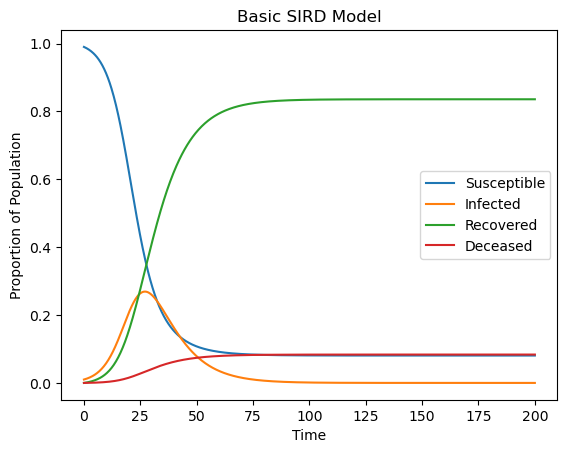

In [2]:
# Define the SIRD model differential equations.
def sird_model(y, t, beta, gamma, delta):
    S, I, R, D = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I - delta * I
    dRdt = gamma * I
    dDdt = delta * I
    return [dSdt, dIdt, dRdt, dDdt]

# Set the initial conditions and parameters.
initial_conditions = [0.99, 0.01, 0, 0]  # S, I, R, D
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
delta = 0.01  # Death rate

# Set the time points for the simulation.
t = np.linspace(0, 200, 1000)

# Solve the ODEs using odeint.
solution = odeint(sird_model, initial_conditions, t, args=(beta, gamma, delta))

# Extract the results.
S, I, R, D = solution.T

# Plot the results.
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, D, label='Deceased')
plt.xlabel('Time')
plt.ylabel('Proportion of Population')
plt.title('Basic SIRD Model')
plt.legend()
plt.show()


## Mobility Based SIRD Model - Random, High, Low

In [5]:
def calculate_averages(final_results, days, index):
    num_columns = days
    columns_sums = [0] * num_columns
    num_items = 0
    for key in final_results:
        sird = final_results[key][index]
        columns_sums = [columns_sums[i] + sird[i] for i in range(num_columns)]
        num_items += 1
    
    print(num_items)
    average_sird = [sum_column / num_items for sum_column in columns_sums]
    return average_sird

        

In [11]:
def dynamic_alpha(type, threshold, beta, mu, N, n_locations, days, alpha_range, trials, c, delta_c, delta_g, birth_rate):
    alpha_sir = {}
    for alpha in alpha_range:
        final_results = {}
        for trial in range(trials):
    
            # Initialize grid and locations
            grid = Grid(n_locations, N, alpha, beta, mu, c)

            # Initialize random starting location based on chosen Mobility Type
            if type == "Random":
                grid.random_orgin()
            elif type == "High Mobility":
                grid.mobility_based_origin(threshold, True)
            else:
                grid.mobility_based_origin(threshold, False)

            susceptible = np.zeros(days)
            infectious = np.zeros(days)
            recovered = np.zeros(days) 
            dead = np.zeros(days)

            for day in range(days):
                for loc in grid.map:
                    if loc.n != 0:
                        infections, total_connections = get_other_loc_params(grid, loc)

                        # find new infections
                        new_infections = (beta * loc.s * loc.i/ loc.n) + ((alpha*loc.s*infections*beta)/(loc.n+total_connections))
                        # determine number of deaths and remove from population
                        infection_deaths = delta_c * loc.i
                        general_deaths_s = delta_g * loc.s
                        general_deaths_r = delta_g * loc.r
                        # determine new recoveris
                        new_recoveries = (mu * loc.i) / loc.n
                        # birth rate impact on the population
                        #born = birth_rate*loc.n


                        # update infections in the location
                        loc.i += new_infections 
                        loc.s -= new_infections
                        
                        
                        loc.i -= infection_deaths
                        #loc.n -= infection_deaths 
                        loc.d += infection_deaths
                        
                        
                        loc.s -= general_deaths_s
                        #loc.n -= general_deaths_s + general_deaths_r
                        loc.d += general_deaths_s + general_deaths_r
                        loc.r -= general_deaths_r

                        
                        loc.i -=  new_recoveries                        
                        loc.r += new_recoveries

                        
                        #loc.n += born 
                        #loc.s += born

                        loc.n = loc.s + loc.i + loc.r + loc.d
                        #print(loc.s,loc.i,loc.r)

                        susceptible[day] = loc.s/loc.n
                        infectious[day] = loc.i/loc.n
                        recovered[day] = loc.r/loc.n
                        dead[day] = loc.d/loc.n
            #susceptible = np.insert(susceptible,1,1)
            #infectious = np.insert(infectious,1/,1)
            #recovered = np.insert(recovered,1,1)
            #dead = np.insert(dead,1,1)
            
            #infectious.insert(0,1/N)
            #recovered.insert(0,0)
            #dead.insert(0,0)
            
            
            final_results[str(trial)] = [susceptible, infectious, recovered, dead]

        susceptible = calculate_averages(final_results, days, 0)
        infectious = calculate_averages(final_results, days, 1)
        recovered = calculate_averages(final_results, days, 2)
        dead = calculate_averages(final_results, days, 3)
            #print(susceptible)
        alpha_sir[alpha] = [susceptible, infectious, recovered, dead]
    #print(alpha_sir)
    return alpha_sir

def sir_plotting(results, type):
    translation = {0:"S", 1:"I", 2:"R", 3:"D"}
    for key, values in results:
        plt.figure()
        for sublist in values:
            plt.plot(sublist, label=translation[values.index(sublist)])
            plt.title(f'SIR Model w/ {type} Mobility: Alpha = {key}')

        plt.legend()
        plt.xlabel("Generations")
        plt.ylabel("Population Density")
    plt.show()


def get_other_loc_params(grid,loc):
    infections = 0
    total_connections = 0
    for j in loc.connections:
        if grid.map[j].n != 0:
            infections += loc.connections[j] * (grid.map[j].i / grid.map[j].n)
            total_connections += loc.connections[j]
    
    return infections, total_connections

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


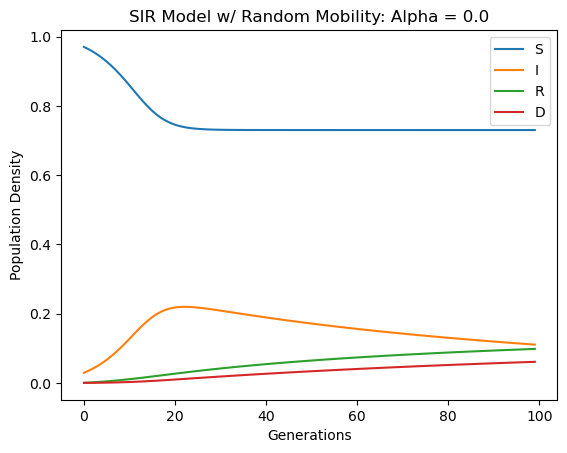

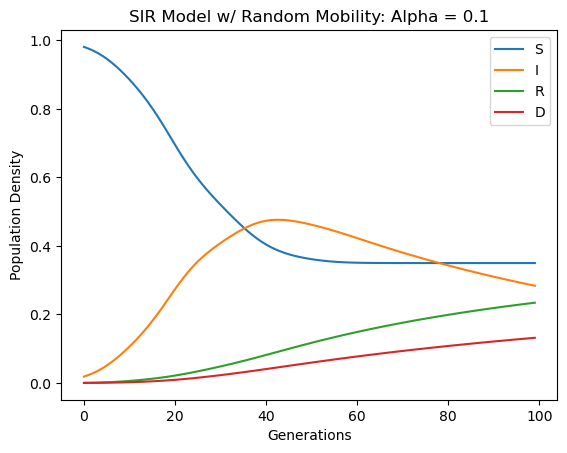

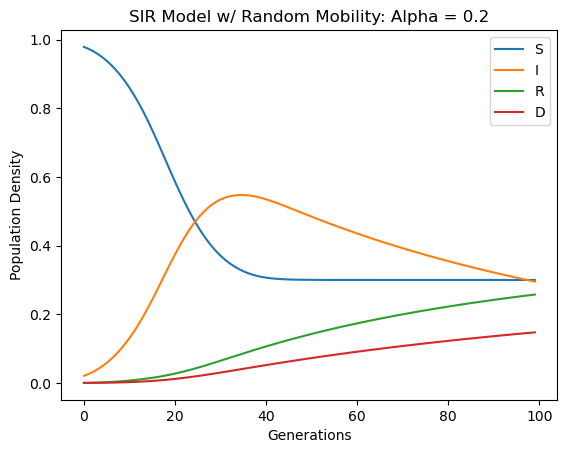

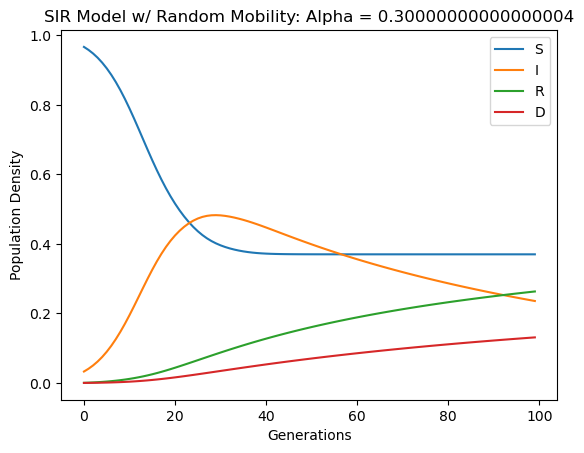

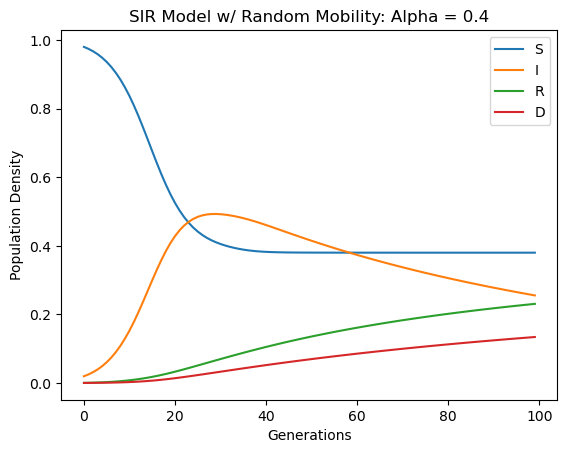

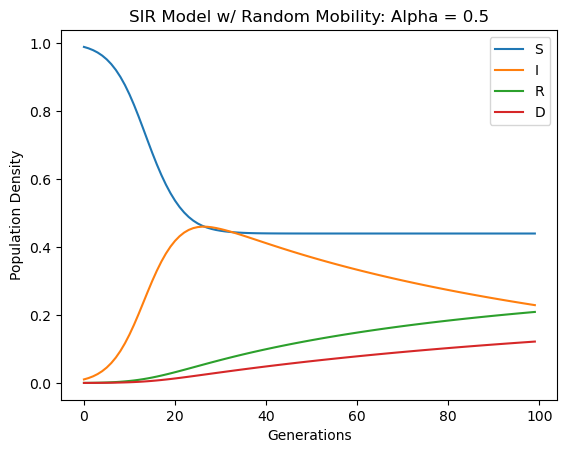

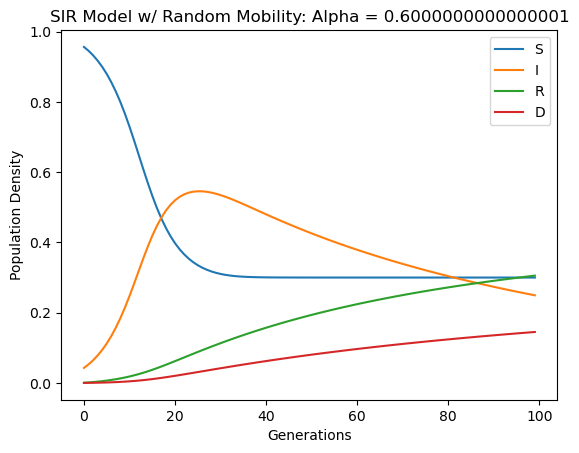

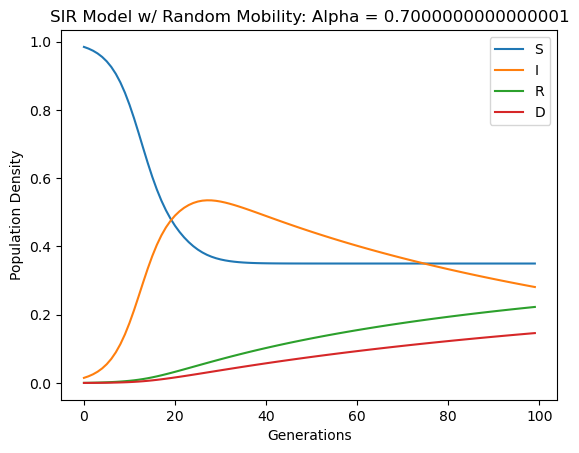

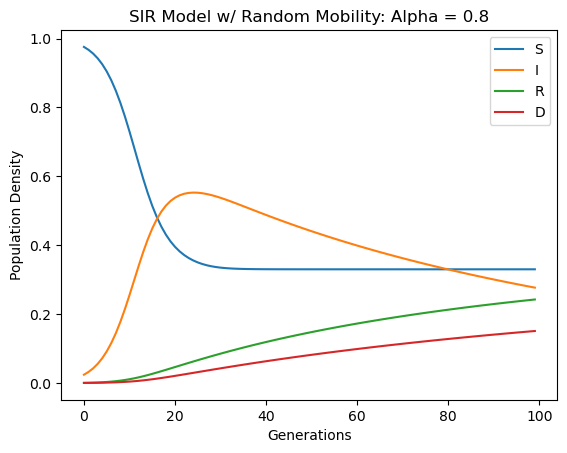

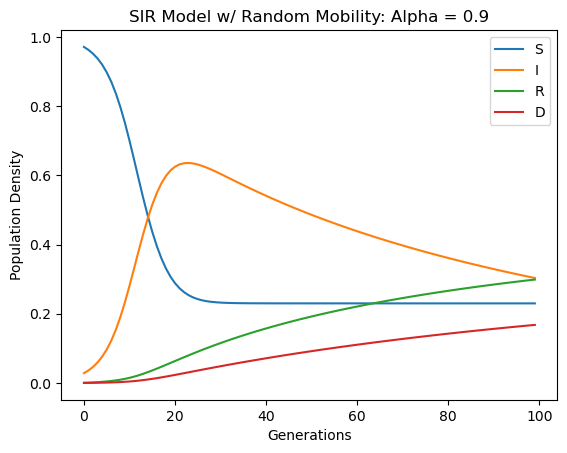

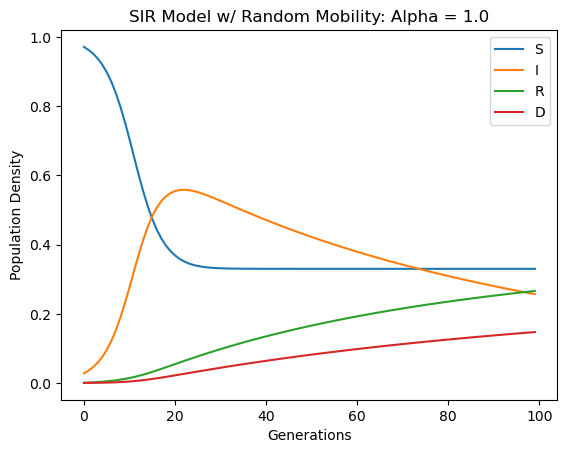

In [12]:
beta = 0.3 # rate of infection *CHANGE LATER MAYBE*
mu = 0.1 # rate of recovery *CHANGE LATER MAYBE*
delta_c = 0.004 # rate of death from COVID for Estonia
delta_g = 0# 0.014 # general death rate in Estonia
birth_rate =0 # 0.009898
N = 100
n_locations=5
days = 100
alphas = np.arange(0,1.1,0.1)
trials=100
c = 0
type = "Random"
threshold = 0.1
dynamic_alpha_results = dynamic_alpha(type, threshold, beta, mu, N, n_locations, days, alphas, trials, c, delta_c, delta_g, birth_rate)
sir_plotting(dynamic_alpha_results.items(), type)
